In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [29]:
url = "/Users/maniii/College/ML/iris.csv"
data = pd.read_csv(url)
data=data.drop(columns=['Id'])
print(data.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [30]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [35]:
k_values = [3, 4, 5]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    print(f"K={k}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


K=3
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



K=4
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

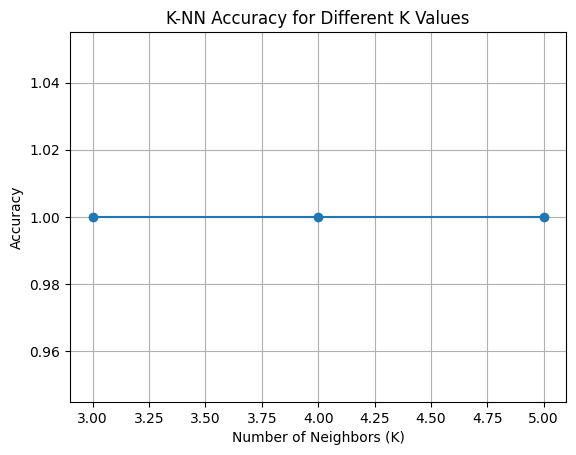

In [32]:
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy for Different K Values")
plt.grid()
plt.show()


In [36]:
x1 = float(input("Enter sepal length: "))
x2 = float(input("Enter sepal width: "))
x3 = float(input("Enter petal length: "))
x4 = float(input("Enter petal width: "))

print(f"Entered values: {x1}, {x2}, {x3}, {x4}")

X_new = np.array([[x1, x2, x3, x4]])
X_new = scaler.transform(X_new)

y_new = knn.predict(X_new)
print(f"Predicted class: {y_new[0]}")

Entered values: 2.0, 3.6, 7.0, 6.9
Predicted class: Iris-virginica
